In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
def plot_metric(week_dates, metric, legends, title, save=False): 
    to_plot_list=[]
    to_plot_list.append(week_dates)
    metric_size_per_week_per_policy = report_df[metric].values
    for i in metric_size_per_week_per_policy:
        to_plot_list.append(i)
        
    to_plot_df = pd.DataFrame(to_plot_list)
    to_plot_df_T = to_plot_df.T
    to_plot_df_T.columns= legends
    fig = plt.figure(figsize=(20,10))
  
    for i in range(1, len(legends)):
        plt.plot( 'date', legends[i], data=to_plot_df_T)
    plt.legend()
    plt.xticks(week_dates, rotation=45)
    plt.ylabel('Bytes', fontsize=18)
    fig.suptitle(title, fontsize=20)
    if save:
        filename = "/Users/ddavila/projects/DOMA/data/model/reports/figures/"
        filename = filename + title.replace(" ", "_")+".png"
        fig.savefig(filename)
    

NANO
    policy max_recalled_per_day max_recalled_day max_workingset_created_size max_workingset_accessed_size total_recalled total_freed
0   1       2.21 TB              2018-11-30       12.34 TB                    9.50 TB                      40.12 TB       56.44 TB  
1   2       2.21 TB              2018-11-30       12.76 TB                    10.66 TB                     24.70 TB       39.84 TB  
2   3       1.34 TB              2019-03-20       12.81 TB                    10.72 TB                     17.43 TB       31.21 TB  
3   4       1.13 TB              2018-11-30       12.81 TB                    11.04 TB                     12.47 TB       26.68 TB  
4   5       1.13 TB              2018-11-30       12.81 TB                    11.18 TB                     8.36 TB        22.19 TB  
5   6       1.13 TB              2018-11-30       12.81 TB                    11.42 TB                     7.07 TB        20.75 TB  
6   7       814.36 GB            2019-06-25       12.83 TB      

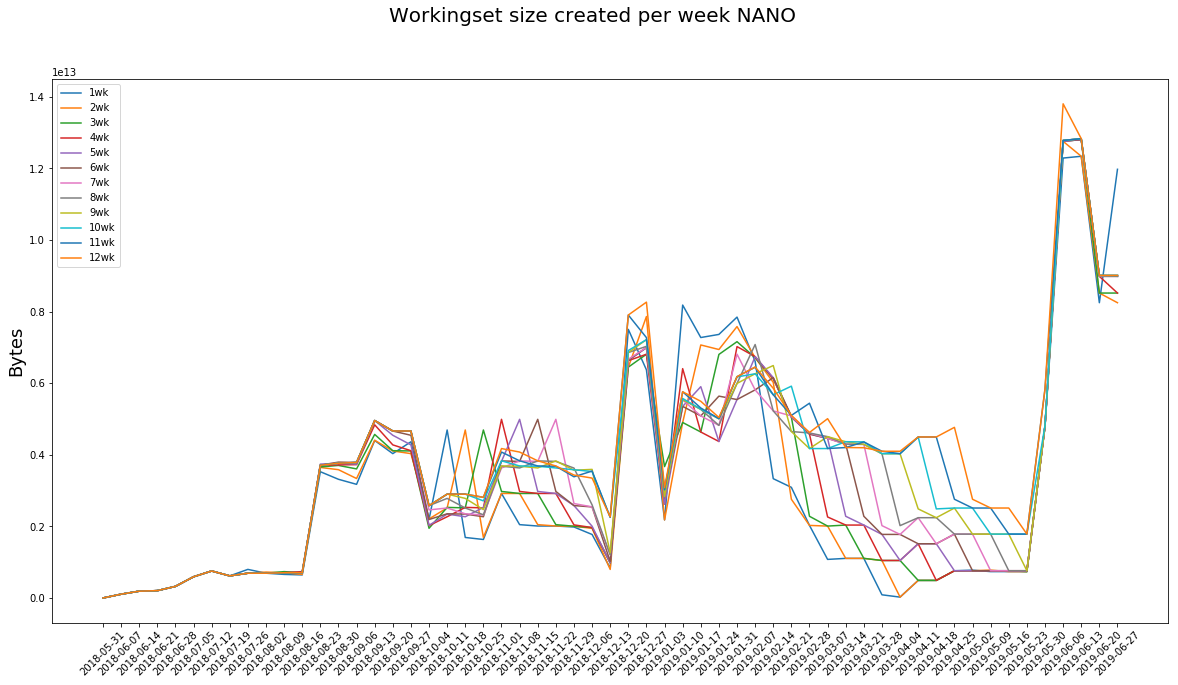

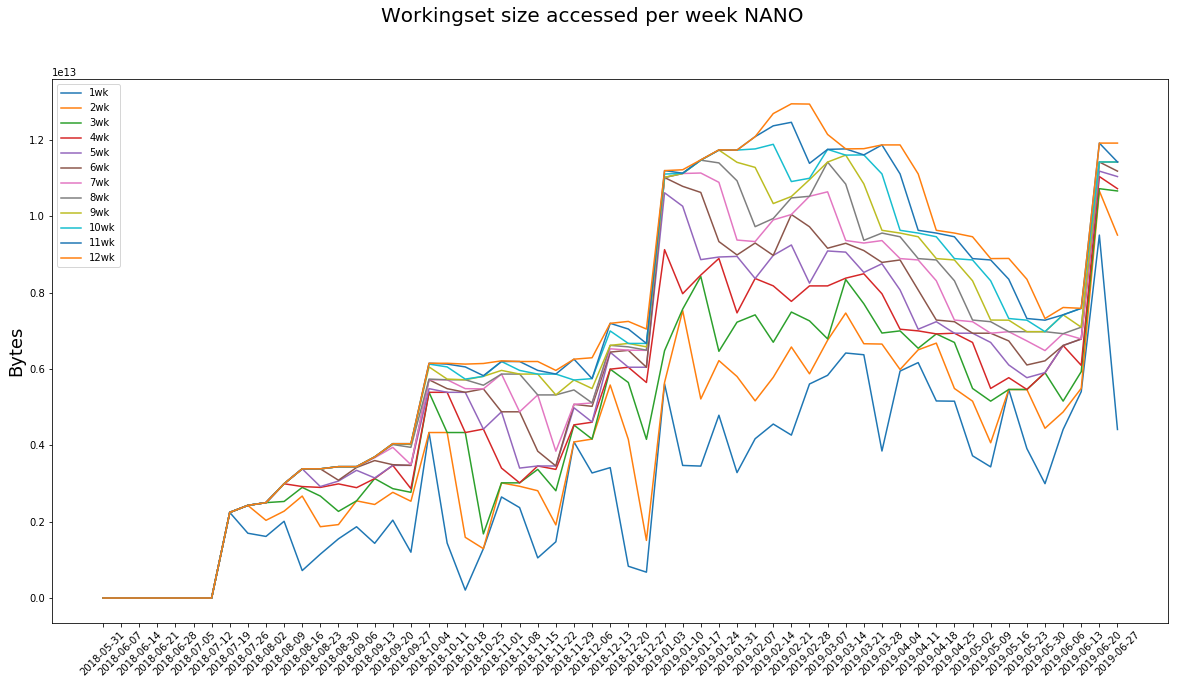

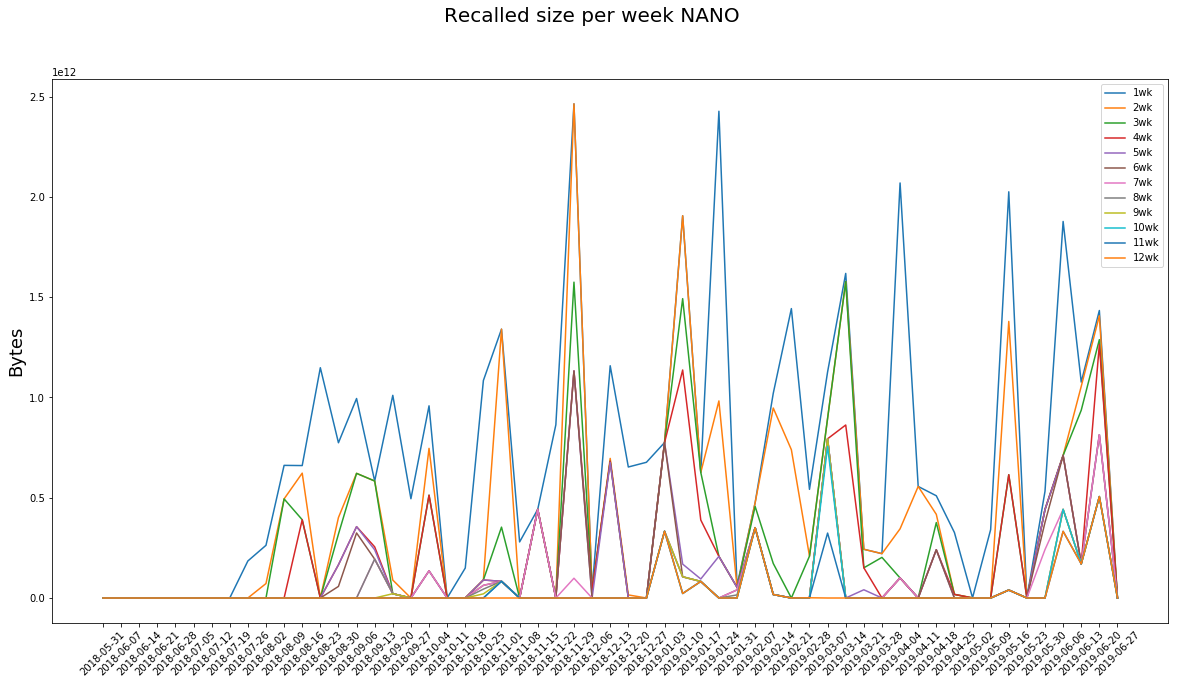

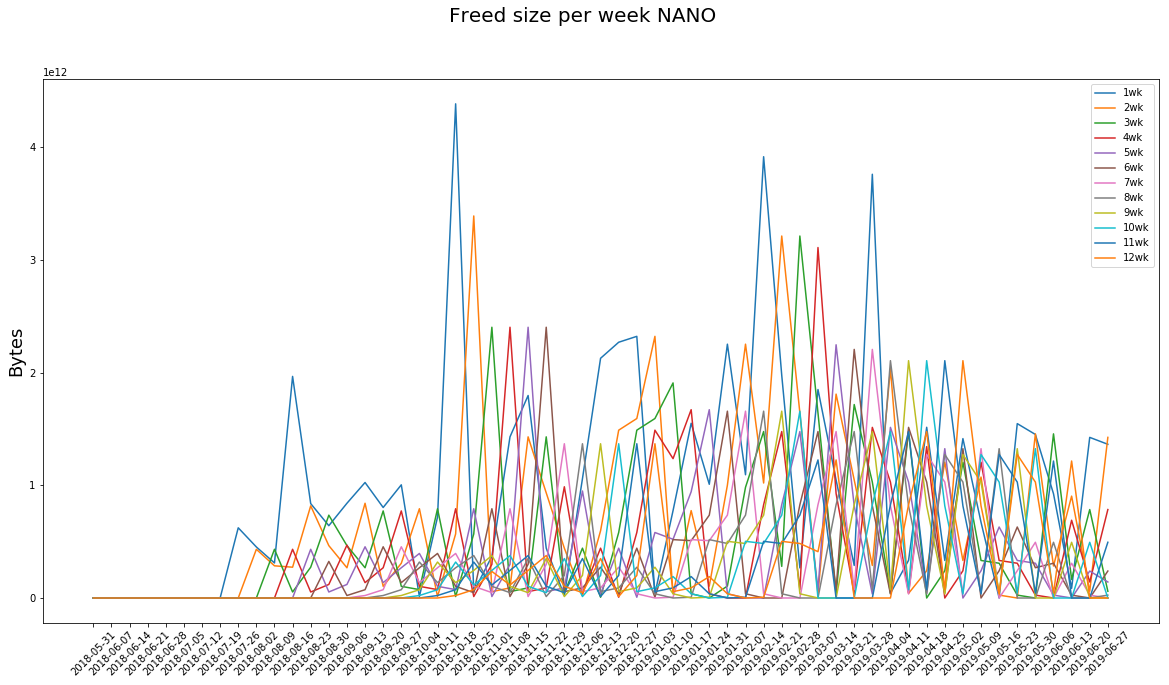

In [12]:
#for datatier in ["NANO", "MINI", "ADO", "REST"]:
for datatier in ["NANO"]:
   # Read the report
    #inputfile="/Users/ddavila/projects/DOMA/data/model/reports/072018_062019_p1_12_"+datatier+"-v2.0"
    inputfile="/Users/ddavila/projects/DOMA/data/model/reports/072018_062019_p1_12_"+datatier+"-v3.0"

    report_df= pd.read_parquet(inputfile)
    a1= report_df['policy']==1
    a2= report_df['policy']==2
    a3= report_df['policy']==3
    #a12= report_df['policy']==12


    #report_df = report_df[a1 | a3 | a6 | a12]
    #report_df = report_df[a1 | a2 | a3 ]

    # Get a list of human readable dates from the timestmps on the report DataFrame
    # to be used for the xticks 
    week_dates= []
    for week_ts in report_df.weeks_ts.values[0]:
        #print(week_ts)
        week_date = datetime.utcfromtimestamp(week_ts).strftime('%Y-%m-%d')
        week_dates.append(week_date)

    # Create the legends list
    legends=["date"]
    for i in report_df.policy.values:
        legend = str(i)+"wk"
        legends.append(legend)

    save=False
    plot_metric(week_dates, "ws_size_created_per_week_per_policy", legends, "Workingset size created per week "+datatier, save)
    plot_metric(week_dates, "ws_size_accessed_per_week_per_policy", legends, "Workingset size accessed per week "+datatier, save)
    plot_metric(week_dates, "recalled_size_per_week_per_policy", legends, "Recalled size per week "+datatier, save)
    plot_metric(week_dates, "freed_size_per_week_per_policy", legends, "Freed size per week "+datatier, save)
    
    df=report_df
    df['max_recalled_week'] = pd.to_datetime(df['max_recalled_week_ts'], unit='s').dt.date
    df['max_recalled_day'] = pd.to_datetime(df['max_recalled_day_ts'], unit='s').dt.date
    df = df[['policy', 'max_recalled_per_day', 'max_recalled_day', 'max_workingset_created_size', 'max_workingset_accessed_size', 'total_recalled', 'total_freed']]
    print(datatier)
    print(df)